# Twitter analysis for Last Mile Delivery

In [1]:
import numpy as np 
import pandas as pd 
import re  
import nltk 
%matplotlib inline
nltk.download('stopwords')  
from nltk.corpus import stopwords 
import seaborn as sns
from textblob import TextBlob, Word, Blobber

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data=pd.read_csv('tweets.csv')
data.head()

,Unnamed: 0,ttext,date,isretweet,retweetcount,favoritecount,score,city,country,duplicate
0,1,AhmedBaba_: Make no mistake about what this is...,2020-04-24 17:28:54,True,158,0,-1,Delhi NCR,India,False
1,2,AhmedBaba_: Make no mistake about what this is...,2020-04-24 17:28:53,True,158,0,-1,Delhi NCR,India,True
2,3,"AhmedBaba_: In the Oval Office, President Trum...",2020-04-24 17:28:51,True,73,0,-1,Delhi NCR,India,False
3,4,"AhmedBaba_: In the Oval Office, President Trum...",2020-04-24 17:28:45,True,73,0,-1,Delhi NCR,India,True
4,5,"AhmedBaba_: In the Oval Office, President Trum...",2020-04-24 17:28:07,True,73,0,-1,Delhi NCR,India,True


In [3]:
# CLEANING OF DATASET
def clean_tweet(tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

# CATEGORISE THE DATA AS PER THEIR SENTIMENTS    
def get_tweet_sentiment( tweet): 
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(clean_tweet(tweet))
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

# READ THE DATASET
data=pd.read_csv('Global10000_4May.csv')

data1=pd.DataFrame(data['ttext'])
df=data['ttext']
data1['sentiments']= [get_tweet_sentiment(t)for t in df]
print(data1) # displays a cleaned dataset

                                                  ttext sentiments
0                            @MrBeastYT Amazon delivery    neutral
1     RT @B16_A1: Thank the lord for Amazon essentia...    neutral
2      Thank the lord for Amazon essential delivery..      neutral
3     Ordered a cheap table and chairs for our balco...   positive
4     @PeachyKeenGreat @ADAMWTF1 @shaunking @amazon ...   positive
...                                                 ...        ...
9995  RT @DBLTAPesports: No one: \n\nAmazon Prime De...    neutral
9996  RT @DBLTAPesports: No one: \n\nAmazon Prime De...    neutral
9997  RT @DBLTAPesports: No one: \n\nAmazon Prime De...    neutral
9998  @r_aguc @MrPuli Like saravana stores they have...    neutral
9999  RT @DBLTAPesports: No one: \n\nAmazon Prime De...    neutral

[10000 rows x 2 columns]


In [6]:

X = data.iloc[:,1].values  
y = data1.iloc[:,-1].values

processed_tweets = []
 
for tweet in range(0, len(X)):  
    # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))
 
    # remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
 
    # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 
    # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 
    # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 
    # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
 
    processed_tweets.append(processed_tweet)
    
    
#print(processed_tweets) 

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer  
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  
X = tfidfconverter.fit_transform(processed_tweets).toarray()

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
 
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  
text_classifier.fit(X_train, y_train)
 
 
predictions = text_classifier.predict(X_test)
 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

In [8]:
print(confusion_matrix(y_test,predictions))  

[[ 155   29   15]
 [   2 1469   12]
 [  12   53  253]]


In [9]:
print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

    negative       0.92      0.78      0.84       199
     neutral       0.95      0.99      0.97      1483
    positive       0.90      0.80      0.85       318

    accuracy                           0.94      2000
   macro avg       0.92      0.86      0.89      2000
weighted avg       0.94      0.94      0.94      2000



In [10]:
print(accuracy_score(y_test, predictions))

0.9385


Total records:  5000
Positive:  2047
Negative:  953
Neutral:  2000


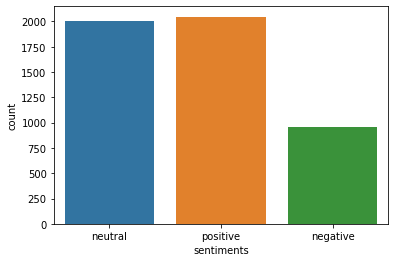

In [11]:
data=pd.read_csv('tweets.csv')
data1=pd.DataFrame(data['ttext'])
df=data['ttext']
data1['sentiments']= [get_tweet_sentiment(t)for t in df]
n_records = len(data1.index)
n_sent_pos = len(data1[data1['sentiments'] == 'positive'])
n_sent_neg = len(data1[data1['sentiments'] == 'negative'])
n_sent_neu = len(data1[data1['sentiments'] == 'neutral'])
print("Total records: ",n_records)
print("Positive: ",n_sent_pos)
print("Negative: ",n_sent_neg)
print("Neutral: ",n_sent_neu)
sns.countplot(x='sentiments', data=data1)

Global total records:  10000
Global  positive:  1521
Global negative:  1135
Global neutral:  7344


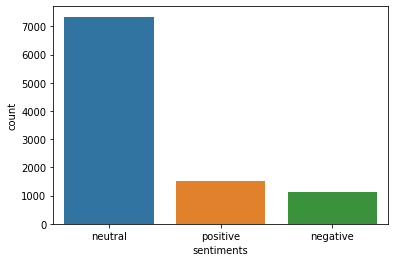

In [12]:
data=pd.read_csv('Global10000_4May.csv')
data1=pd.DataFrame(data['ttext'])
df=data['ttext']
data1['sentiments']= [get_tweet_sentiment(t)for t in df]
n_records = len(data1.index)
n_sent_pos = len(data1[data1['sentiments'] == 'positive'])
n_sent_neg = len(data1[data1['sentiments'] == 'negative'])
n_sent_neu = len(data1[data1['sentiments'] == 'neutral'])
print("Global total records: ",n_records)
print("Global  positive: ",n_sent_pos)
print("Global negative: ",n_sent_neg)
print("Global neutral: ",n_sent_neu)
sns.countplot(x='sentiments', data=data1)

In [13]:
data=pd.read_csv('delhi_4may.csv')
data1=pd.DataFrame(data['ttext'])
df=data['ttext']
data1['sentiments']= [get_tweet_sentiment(t)for t in df]
n_records = len(data1.index)
n_sent_pos = len(data1[data1['sentiments'] == 'positive'])
n_sent_neg = len(data1[data1['sentiments'] == 'negative'])
n_sent_neu = len(data1[data1['sentiments'] == 'neutral'])
print("DELHI total records: ",n_records)
print("DELHI  positive: ",n_sent_pos)
print("DELHI negative: ",n_sent_neg)
print("DELHI neutral: ",n_sent_neu)


DELHI total records:  141
DELHI  positive:  26
DELHI negative:  50
DELHI neutral:  65


MUMBAI total records:  113
MUMBAI  positive:  41
MUMBAI negative:  14
MUMBAI neutral:  58


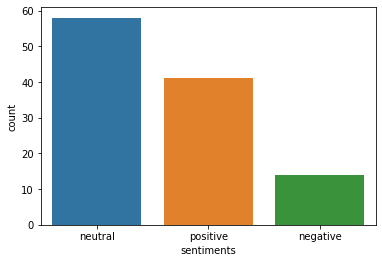

In [14]:
data=pd.read_csv('mumbai_4_May.csv')
data1=pd.DataFrame(data['ttext'])
df=data['ttext']
data1['sentiments']= [get_tweet_sentiment(t)for t in df]
n_records = len(data1.index)
n_sent_pos = len(data1[data1['sentiments'] == 'positive'])
n_sent_neg = len(data1[data1['sentiments'] == 'negative'])
n_sent_neu = len(data1[data1['sentiments'] == 'neutral'])
print("MUMBAI total records: ",n_records)
print("MUMBAI  positive: ",n_sent_pos)
print("MUMBAI negative: ",n_sent_neg)
print("MUMBAI neutral: ",n_sent_neu)
sns.countplot(x='sentiments', data=data1)

BANGALORE total records:  113
BANGALORE  positive:  41
BANGALORE negative:  14
BANGALORE neutral:  58


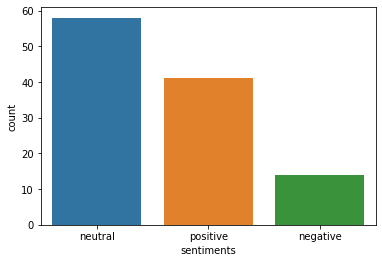

In [15]:
data=pd.read_csv('bangalore_4_May.csv')
data1=pd.DataFrame(data['ttext'])
df=data['ttext']
data1['sentiments']= [get_tweet_sentiment(t)for t in df]
n_records = len(data1.index)
n_sent_pos = len(data1[data1['sentiments'] == 'positive'])
n_sent_neg = len(data1[data1['sentiments'] == 'negative'])
n_sent_neu = len(data1[data1['sentiments'] == 'neutral'])
print("BANGALORE total records: ",n_records)
print("BANGALORE  positive: ",n_sent_pos)
print("BANGALORE negative: ",n_sent_neg)
print("BANGALORE neutral: ",n_sent_neu)
sns.countplot(x='sentiments', data=data1)

KERALA total records:  15
KERALA  positive:  5
KERALA negative:  1
KERALA neutral:  9


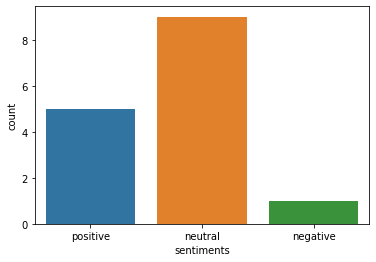

In [16]:
data=pd.read_csv('Kerala_4_May.csv')
data1=pd.DataFrame(data['ttext'])
df=data['ttext']
data1['sentiments']= [get_tweet_sentiment(t)for t in df]
n_records = len(data1.index)
n_sent_pos = len(data1[data1['sentiments'] == 'positive'])
n_sent_neg = len(data1[data1['sentiments'] == 'negative'])
n_sent_neu = len(data1[data1['sentiments'] == 'neutral'])
print("KERALA total records: ",n_records)
print("KERALA  positive: ",n_sent_pos)
print("KERALA negative: ",n_sent_neg)
print("KERALA neutral: ",n_sent_neu)
sns.countplot(x='sentiments', data=data1)

Haryana total records:  131
Haryana positive:  43
Haryana negative:  35
Haryana neutral:  53


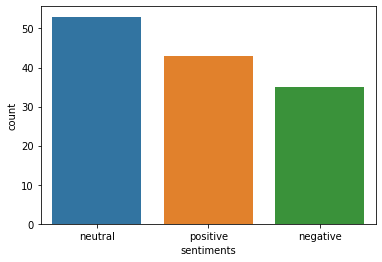

In [17]:
data=pd.read_csv('haryana_4_May.csv')
data1=pd.DataFrame(data['ttext'])
df=data['ttext']
data1['sentiments']= [get_tweet_sentiment(t)for t in df]
n_records = len(data1.index)
n_sent_pos = len(data1[data1['sentiments'] == 'positive'])
n_sent_neg = len(data1[data1['sentiments'] == 'negative'])
n_sent_neu = len(data1[data1['sentiments'] == 'neutral'])
print("Haryana total records: ",n_records)
print("Haryana positive: ",n_sent_pos)
print("Haryana negative: ",n_sent_neg)
print("Haryana neutral: ",n_sent_neu)
sns.countplot(x='sentiments', data=data1)

Uttar Pradesh total records:  7
Uttar Pradesh  positive:  6
Uttar Pradesh negative:  0
Uttar Pradesh neutral:  1


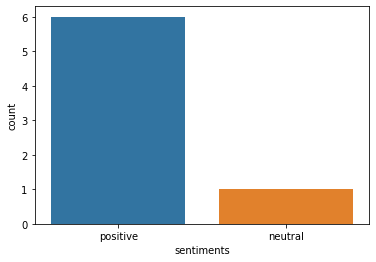

In [18]:
data=pd.read_csv('uttarpradesh_4_May.csv')
data1=pd.DataFrame(data['ttext'])
df=data['ttext']
data1['sentiments']= [get_tweet_sentiment(t)for t in df]
n_records = len(data1.index)
n_sent_pos = len(data1[data1['sentiments'] == 'positive'])
n_sent_neg = len(data1[data1['sentiments'] == 'negative'])
n_sent_neu = len(data1[data1['sentiments'] == 'neutral'])
print("Uttar Pradesh total records: ",n_records)
print("Uttar Pradesh  positive: ",n_sent_pos)
print("Uttar Pradesh negative: ",n_sent_neg)
print("Uttar Pradesh neutral: ",n_sent_neu)
sns.countplot(x='sentiments', data=data1)